## **Requisitos do professor**:

> ### **Definição e Preparação da Base de Dados**:
> - Entrega do relatório técnico e dataset processado. 
> 
> ### **No qual o grupo precisa conter**: 
> - Descrição do problema: Explicação sobre o problema de negócios da empresa que será resolvido com IA. 
> - Coleta e limpeza dos dados: Fonte da base de dados (pública ou fornecida pela empresa), tratamento de valores ausentes, remoção de outliers e normalização dos dados. 
> - Exploração e análise inicial: Estatísticas descritivas, gráficos de distribuição e possíveis correlações. 
> - Ferramentas utilizadas: Pandas, Matplotlib, Seaborn. Documento detalhado com screenshots e explicações sobre as transformações nos dados.

Nesta célula, são importadas as bibliotecas essenciais para manipulação (Pandas) e visualização (Matplotlib, Seaborn) dos dados.

In [ ]:
# Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura o estilo dos gráficos e garante a exibição no notebook
sns.set(style="whitegrid")
%matplotlib inline

O Pandas é utilizado para carregar o dataset localmente. A função read_csv lê o arquivo CSV, e o head() exibe os primeiros registros para conferirmos a estrutura e as colunas do dataset.

Pelo tamanho, o arquivo deve ser baixado manualmente no [Keggle](https://www.kaggle.com/datasets/hrish4/taxi-trip-fare-data-2023) e movido para a pasta src/Entregas/Entrega 1 como `taxi-trip-data.csv`.

In [ ]:
# Carregamento do Dataset
# O arquivo "taxi-trip-data.csv" deve estar na mesma pasta do notebook
df = pd.read_csv("taxi-trip-data.csv")
print("Primeiros registros do dataset:")
print(df.head())


Primeiros registros do dataset:
   passenger_count  trip_distance payment_type  fare_amount   duration
0                1           3.70         Card         24.0  27.950000
1                1           2.77         Card         18.4  19.200000
2                1           3.30         Card         22.6  27.383333
3                1           0.30         Cash          5.1   2.550000
4                1           0.83         Card          7.2   5.250000


Esta célula realiza uma exploração inicial:

- info() mostra os tipos de dados e a quantidade de registros.
- describe() gera estatísticas descritivas dos campos numéricos.
- isnull().sum() identifica a existência de valores ausentes, indicando se há necessidade de tratamento.

In [18]:
# Exploração Inicial dos Dados
print("Informações do dataset:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451090 entries, 0 to 8451089
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   payment_type     object 
 3   fare_amount      float64
 4   duration         float64
dtypes: float64(3), int64(1), object(1)
memory usage: 322.4+ MB
None

Estatísticas descritivas:
       passenger_count  trip_distance   fare_amount      duration
count     8.451090e+06   8.451090e+06  8.451090e+06  8.451090e+06
mean      1.339824e+00   1.751135e+00  1.273180e+01  1.173603e+01
std       7.658024e-01   1.045488e+00  5.346809e+00  6.218064e+00
min       1.000000e+00   1.000000e-02  1.000000e-02  1.666667e-02
25%       1.000000e+00   9.700000e-01  8.600000e+00  6.900000e+00
50%       1.000000e+00   1.500000e+00  1.210000e+01  1.065000e+01
75%       1.000000e+00   2.300000e+00  1.630000e+01  1.561667e+01
max       5.000000e+00   5.230

Nesta etapa:

- Eliminamos registros com valores ausentes para garantir a integridade dos dados.
- Removemos outliers em fare_amount com base nos percentis de 1% e 99%, prevenindo distorções nas análises.
- Aplicamos normalização (Min-Max Scaling) nas colunas numéricas, padronizando os dados e preparando-os para algoritmos de IA.

In [19]:
# Limpeza e Preparação dos Dados
# Cria uma cópia para preservar os dados originais
df_clean = df.copy()

# Remoção de registros com valores ausentes
df_clean = df_clean.dropna()

# Remoção de outliers na coluna 'fare_amount' utilizando os percentis 1% e 99%
fare_lower = df_clean['fare_amount'].quantile(0.01)
fare_upper = df_clean['fare_amount'].quantile(0.99)
df_clean = df_clean[(df_clean['fare_amount'] >= fare_lower) & (df_clean['fare_amount'] <= fare_upper)]

# Normalização das colunas numéricas utilizando Min-Max Scaling
numeric_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'duration']
df_normalized = df_clean.copy()
for col in numeric_cols:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)

print("Dados após limpeza e normalização:")
print(df_normalized.head())


Dados após limpeza e normalização:
   passenger_count  trip_distance payment_type  fare_amount  duration
0              0.0       0.706897         Card      0.87500  0.933185
1              0.0       0.528736         Card      0.62500  0.640869
2              0.0       0.630268         Card      0.81250  0.914254
3              0.0       0.055556         Cash      0.03125  0.084633
4              0.0       0.157088         Card      0.12500  0.174833


Utiliza-se histogramas para entender a distribuição dos dados normalizados, o que ajuda a visualizar a dispersão e concentração dos valores. O heatmap da matriz de correlação permite identificar relações entre as variáveis, evidenciando quais atributos podem ter maior influência na tarifa.

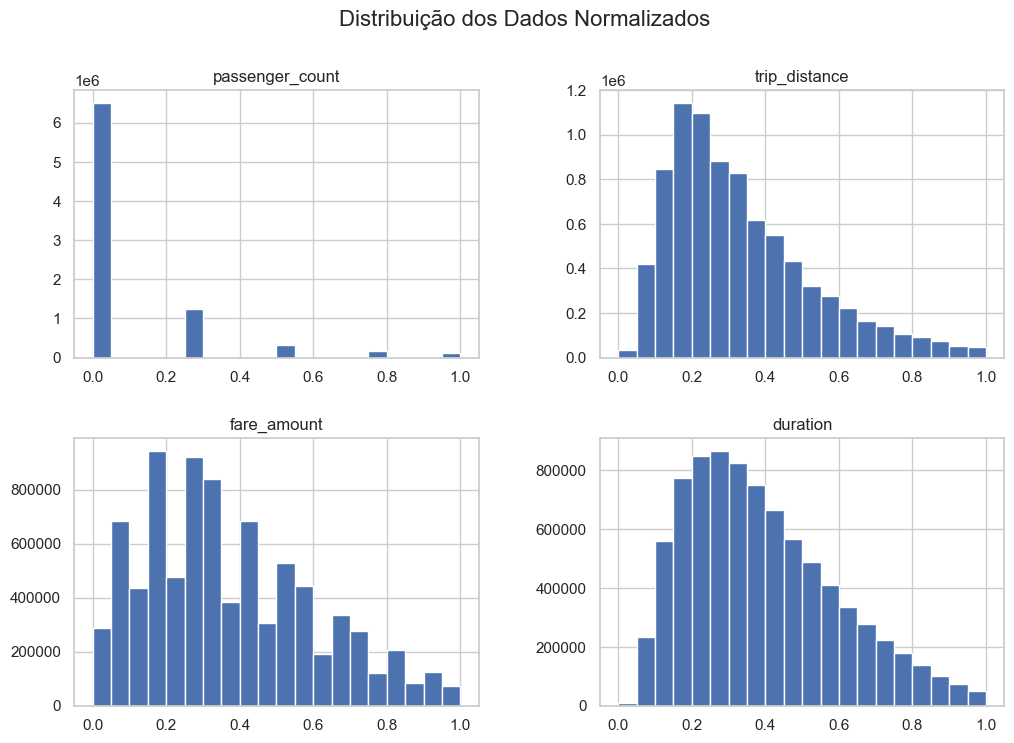

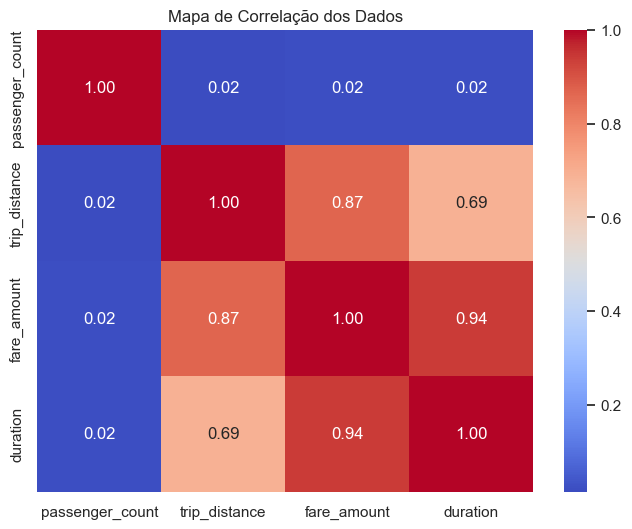

In [20]:
# Análise Exploratória e Visualizações
# Histograma para visualizar a distribuição das variáveis numéricas
df_normalized[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribuição dos Dados Normalizados", fontsize=16)
plt.show()

# Mapa de correlação para identificar relações entre as variáveis numéricas
plt.figure(figsize=(8, 6))
corr_matrix = df_clean[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação dos Dados")
plt.show()


## Relatório Técnico (Markdown)

### Relatório Técnico – Preparação da Base de Dados

#### 1. Descrição do Problema
O projeto busca analisar e prever a tarifa (*fare_amount*) das viagens de táxi, contribuindo para uma estratégia de precificação mais precisa e competitiva, o que pode auxiliar na tomada de decisão da empresa.

#### 2. Coleta e Limpeza dos Dados
- **Fonte dos Dados:** O dataset "taxi-trip-data.csv" foi baixado e armazenado localmente.
- **Coleta:** O arquivo foi importado utilizando `pd.read_csv`, garantindo o acesso aos dados brutos.
- **Limpeza:**  
  - Remoção de registros com valores ausentes, assegurando a integridade dos dados.  
  - Eliminação de outliers em *fare_amount* com base nos percentis de 1% e 99%, evitando distorções na análise.  
  - Normalização dos dados numéricos por meio do Min-Max Scaling, padronizando os valores para futuras análises.

#### 3. Exploração e Análise Inicial
- **Estatísticas Descritivas:** Proporcionam uma visão geral sobre a distribuição e os principais parâmetros dos dados.
- **Visualizações:**  
  - Histogramas ajudam a identificar a distribuição dos dados normalizados.  
  - O mapa de correlação (heatmap) evidencia as relações entre as variáveis, fornecendo insights sobre quais atributos podem ser mais determinantes na modelagem.

#### 4. Ferramentas Utilizadas
- **Pandas:** Manipulação, limpeza e preparação dos dados.
- **Matplotlib & Seaborn:** Criação de gráficos e visualizações para análise exploratória.
- **Visão Geral:** Cada transformação aplicada ao dataset é um passo estratégico para construir modelos de IA robustos e eficientes.

## Referências

- [Pandas - importação](https://pandas.pydata.org/docs/user_guide/io.html)
- [Pandas - Operações](https://pandas.pydata.org/docs/reference/frame.html)
- [Seaborn - Gráficos](https://matplotlib.org/stable/api/pyplot_summary.html)